In [23]:
library(data.table)
library(ggplot2)
library(qvalue)
library(pheatmap)
library(gridExtra)
library(dplyr)
library(reshape2)

In [2]:
cts=c('PBMC', 'B', 'cM', 'ncM', 'Th', 'Tc', 'cDC', 'MK', 'NK')
cts

[1] "PBMC" "B"    "cM"   "ncM"  "Th"   "Tc"   "cDC"  "MK"   "NK"

In [3]:
load_data <- function(ct, dir){
    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))   
    
 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls, emp=res))
}


load_data_res <- function(ct, dir){
#    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
#    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))    

 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls))
}


#get unique eQTL genes given FDR threshold
getUnique<- function(obj, ct, thresh=0.1){
    eqtls=obj[[ct]]$emp
    genes=eqtls[which(eqtls$FDR < thresh), ]$Actual
    genes=sapply(strsplit(genes, '_'), '[', 2)
    return(genes)
}

dir='/ye/yelabstore3/10x.lupus/eqtls/v5/sle.10pcs/all/'
sle=list()
for(ct in cts){
    print(ct)
    sle[[ct]]=load_data(ct, dir)
}



[1] "PBMC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "B"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "ncM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Th"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Tc"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cDC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "MK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "NK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

In [4]:
sle_delta=list()
dir_delta='/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/'
for(ct in cts[-1]){
    print(ct)
    sle_delta[[ct]]=load_data_res(ct, dir_delta)
}

max.pv=list()

max.pv=list()
for(c in cts){
    print(c)
    emp=sle[[c]]$emp
    qtls=emp[which(emp$FDR < 0.1),]$Actual
    genes=sapply(strsplit(as.character(qtls), '_'), '[', 2)
    qtls=sle[[c]]$all[match(genes, sle[[c]]$all$gene), ]
    qtls$id=paste(qtls$SNP, qtls$gene, sep='_')
    max.pv[[c]]=max(qtls$"p-value")
    
}
print(max.pv)



[1] "B"
[1] "cM"
[1] "ncM"
[1] "Th"
[1] "Tc"
[1] "cDC"
[1] "MK"
[1] "NK"
[1] "PBMC"
[1] "B"
[1] "cM"
[1] "ncM"
[1] "Th"
[1] "Tc"
[1] "cDC"
[1] "MK"
[1] "NK"
$PBMC
[1] 0.0016441

$B
[1] 0.0001499762

$cM
[1] 0.0006143935

$ncM
[1] 0.0002802314

$Th
[1] 0.0003461395

$Tc
[1] 0.0004084893

$cDC
[1] 8.62522e-05

$MK
[1] 5.002173e-06

$NK
[1] 0.0001064974



In [5]:
het.snps=list()
all.snps=list()

for(ct in cts[-1]){
    print(ct)
    ct.res=sle[[ct]]$all
    ct.sig=ct.res[which(ct.res$"p-value" < max.pv[[ct]]), ]
    all.snps[[ct]]=unique(ct.sig$SNP)
    all.snps.id=paste(ct.sig$SNP, ct.sig$gene, ct, sep='_')

    ct.res=sle_delta[[ct]]$all
    ct.res$id=paste(ct.res$SNP, ct.res$gene, ct, sep='_')
    ct.sig=ct.res[match(all.snps.id, ct.res$id),]
    ct.sig$FDR=qvalue(ct.sig$"p-value")$qvalues
    het.snps[[ct]]=unique(ct.sig$SNP[which(ct.sig$FDR < 0.05)])
    
}


pbmc=sle[['PBMC']]$all
all.snps[['PBMC']]=unique(pbmc[which(pbmc$"p-value" < max.pv[['PBMC']]), ]$SNP)
het.snps[['PBMC']]=all.snps[['PBMC']]

[1] "B"
[1] "cM"
[1] "ncM"
[1] "Th"
[1] "Tc"
[1] "cDC"
[1] "MK"
[1] "NK"


In [6]:
downsampleQQ <- function(all.df){
    xpvs=all.df$exp
    ypvs=all.df$obs

    levels = as.integer( xpvs/xpvs[1] * 0.5e3);
    keep = c(TRUE, diff(levels)!=0);
    levels = as.integer( ypvs/ypvs[1] * 0.5e3);
    keep = keep | c(TRUE, diff(levels)!=0);
    ypvs = ypvs[keep];
    xpvs = xpvs[keep];

    all.df.ds=all.df[keep, ]
    return(all.df.ds)
}

In [7]:
bentham_sle=fread('/ye/yelabstore3/10x.lupus/bulk.compare/bentham_2015_26502338_sle_efo0002690_1_gwas.sumstats.tsv')
bentham_sle$snp=paste(bentham_sle$chrom, bentham_sle$pos, sep=':')
gwas.snps=bentham_sle$snp
gwas.sig=bentham_sle$snp[which(bentham_sle$p < 1e-8)]



In [8]:
all.gwas=-log10(sort(bentham_sle$p, decreasing=F, na.last=T))
th.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['Th']])], decreasing = F,na.last = T))
b.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['B']])], decreasing = F,na.last = T))
nk.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['NK']])], decreasing = F,na.last = T))
cm.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['cM']])], decreasing = F,na.last = T))
cdc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['cDC']])], decreasing = F,na.last = T))
pbmc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['PBMC']])], decreasing = F,na.last = T))
tc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.snps[['Tc']])], decreasing = F,na.last = T))



exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(th.gwas)/length(th.gwas)), -log10(1:length(b.gwas)/length(b.gwas)))
exp=c(exp,-log10(1:length(nk.gwas)/length(nk.gwas)), -log10(1:length(cm.gwas)/length(cm.gwas)))
exp=c(exp,-log10(1:length(cdc.gwas)/length(cdc.gwas)), -log10(1:length(pbmc.gwas)/length(pbmc.gwas)))
exp=c(exp, -log10(1:length(tc.gwas)/length(tc.gwas)))

obs=c(all.gwas, th.gwas, b.gwas, nk.gwas, cm.gwas, cdc.gwas, pbmc.gwas, tc.gwas)


val=c(rep('all GWAS', length(gwas.snps)), rep('Th', length(th.gwas)), rep('B', length(b.gwas)), rep('NK', length(nk.gwas)))
val=c(val, rep('cM', length(cm.gwas)), rep('cDC', length(cdc.gwas)), rep('PBMC', length(pbmc.gwas)))
val=c(val, rep('Tc', length(tc.gwas)))

df=data.frame(exp=exp, obs=obs,val=val)
print(head(df))

df.use=downsampleQQ(df)

       exp      obs      val
1 6.898465 102.1739 all GWAS
2 6.597435 101.5338 all GWAS
3 6.421343 100.8400 all GWAS
4 6.296405 100.6823 all GWAS
5 6.199495 100.2433 all GWAS
6 6.120313 100.1568 all GWAS


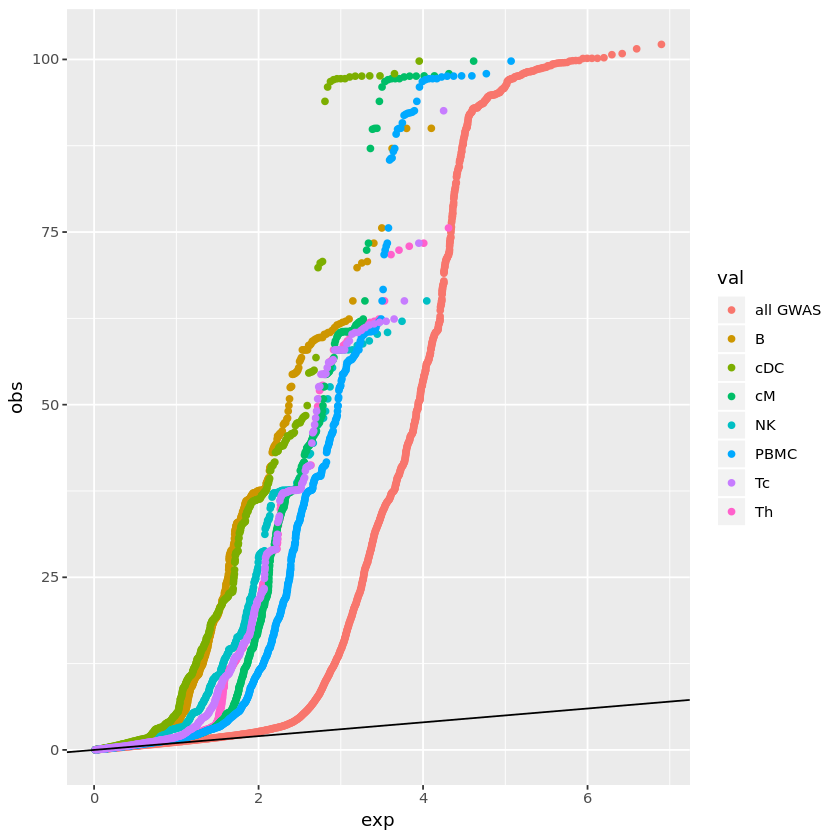

In [9]:
ggplot(df.use,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)

       exp      obs      val
1 6.898465 102.1739 all GWAS
2 6.597435 101.5338 all GWAS
3 6.421343 100.8400 all GWAS
4 6.296405 100.6823 all GWAS
5 6.199495 100.2433 all GWAS
6 6.120313 100.1568 all GWAS


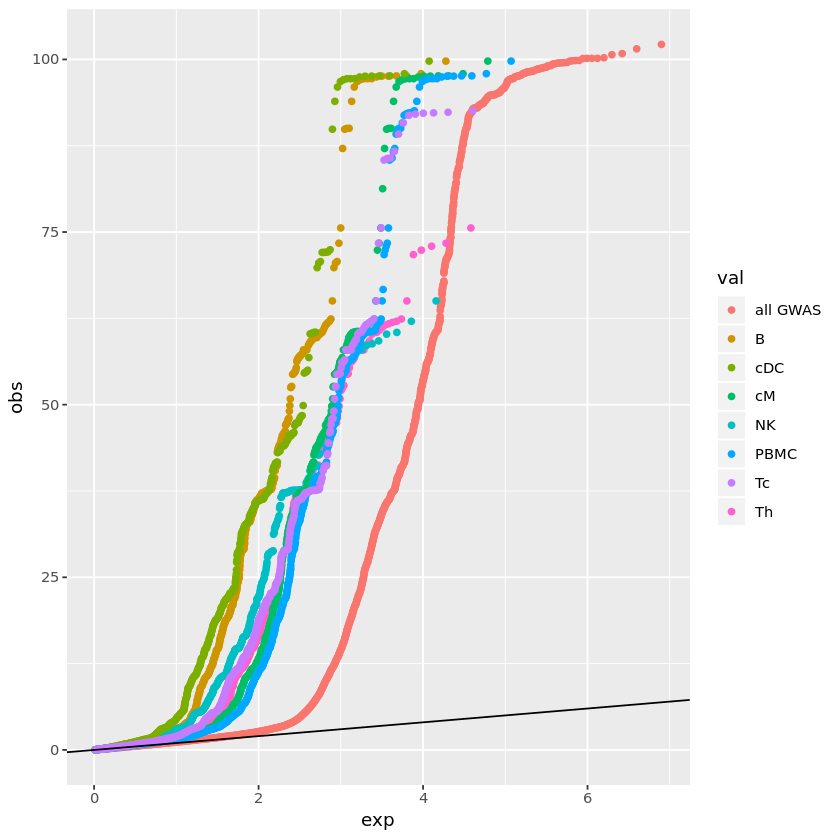

In [10]:
th.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['Th']])], decreasing = F,na.last = T))
b.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['B']])], decreasing = F,na.last = T))
nk.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['NK']])], decreasing = F,na.last = T))
cm.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['cM']])], decreasing = F,na.last = T))
cdc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['cDC']])], decreasing = F,na.last = T))
pbmc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['PBMC']])], decreasing = F,na.last = T))
tc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['Tc']])], decreasing = F,na.last = T))


exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(th.gwas)/length(th.gwas)), -log10(1:length(b.gwas)/length(b.gwas)))
exp=c(exp,-log10(1:length(nk.gwas)/length(nk.gwas)), -log10(1:length(cm.gwas)/length(cm.gwas)))
exp=c(exp,-log10(1:length(cdc.gwas)/length(cdc.gwas)), -log10(1:length(pbmc.gwas)/length(pbmc.gwas)))
exp=c(exp, -log10(1:length(tc.gwas)/length(tc.gwas)))

obs=c(all.gwas, th.gwas, b.gwas, nk.gwas, cm.gwas, cdc.gwas, pbmc.gwas, tc.gwas)


val=c(rep('all GWAS', length(gwas.snps)), rep('Th', length(th.gwas)), rep('B', length(b.gwas)), rep('NK', length(nk.gwas)))
val=c(val, rep('cM', length(cm.gwas)), rep('cDC', length(cdc.gwas)), rep('PBMC', length(pbmc.gwas)))
val=c(val, rep('Tc', length(tc.gwas)))

df=data.frame(exp=exp, obs=obs,val=val)
print(head(df))

df.use=downsampleQQ(df)
ggplot(df.use,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)

       exp      obs  val
1 6.898465 102.1739 GWAS
2 6.597435 101.5338 GWAS
3 6.421343 100.8400 GWAS
4 6.296405 100.6823 GWAS
5 6.199495 100.2433 GWAS
6 6.120313 100.1568 GWAS


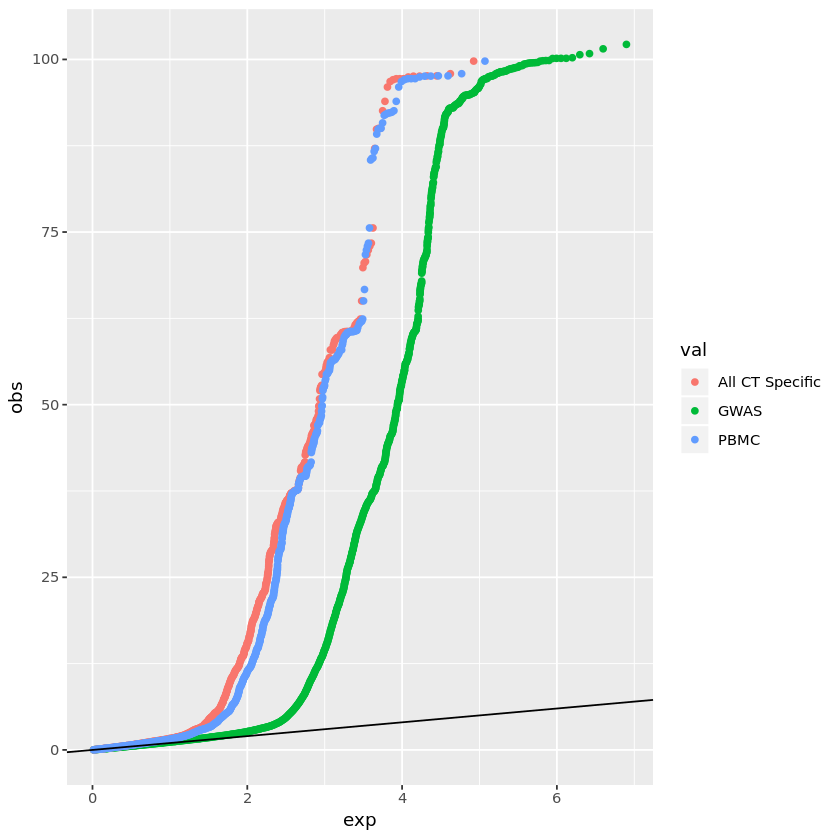

In [11]:
all.ct.snps=c()
for(ct in cts[-1]){
    all.ct.snps=c(all.ct.snps, het.snps[[ct]])
    
}

all.ct.snps=unique(all.ct.snps)

all.ct.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.ct.snps)], decreasing = F,na.last = T))
pbmc.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% all.snps[['PBMC']])], decreasing = F,na.last = T))

exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(all.ct.gwas)/length(all.ct.gwas)), -log10(1:length(pbmc.gwas)/length(pbmc.gwas)))
obs=c(all.gwas, all.ct.gwas, pbmc.gwas)

val=c(rep('GWAS',length(all.gwas)), rep('All CT Specific', length(all.ct.gwas)), rep('PBMC', length(pbmc.gwas)))

df=data.frame(exp=exp, obs=obs,val=val)
print(head(df))

df.use=downsampleQQ(df)
ggplot(df.use,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)


In [14]:
#do the same thing with crohns
cd=fread('/ye/yelabstore3/10x.lupus/bulk.compare/EUR.CD.gwas_info03_filtered.assoc')
cd$snp=paste(cd$CHR, cd$BP, sep=':')


       exp      obs      val
1 7.041498 60.48879 all GWAS
2 6.740468 60.16539 all GWAS
3 6.564376 60.08134 all GWAS
4 6.439438 56.20894 all GWAS
5 6.342528 55.43950 all GWAS
6 6.263346 55.43250 all GWAS


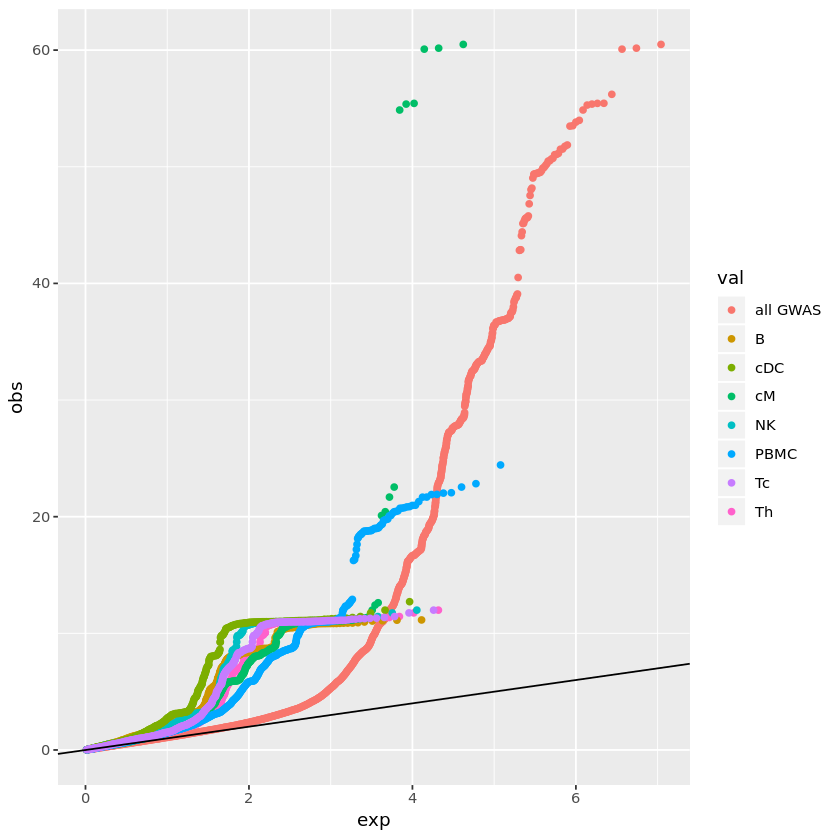

In [18]:
all.gwas=-log10(sort(cd$P, decreasing=F, na.last=T))
gwas.snps=cd$snp
th.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['Th']])], decreasing = F,na.last = T))
b.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['B']])], decreasing = F,na.last = T))
nk.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['NK']])], decreasing = F,na.last = T))
cm.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['cM']])], decreasing = F,na.last = T))
cdc.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['cDC']])], decreasing = F,na.last = T))
pbmc.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['PBMC']])], decreasing = F,na.last = T))
tc.gwas=-log10(sort(cd$P[which(gwas.snps %in% het.snps[['Tc']])], decreasing = F,na.last = T))

exp=c(-log10(1:nrow(cd)/nrow(cd)), -log10(1:length(th.gwas)/length(th.gwas)), -log10(1:length(b.gwas)/length(b.gwas)))
exp=c(exp,-log10(1:length(nk.gwas)/length(nk.gwas)), -log10(1:length(cm.gwas)/length(cm.gwas)))
exp=c(exp,-log10(1:length(cdc.gwas)/length(cdc.gwas)), -log10(1:length(pbmc.gwas)/length(pbmc.gwas)))
exp=c(exp, -log10(1:length(tc.gwas)/length(tc.gwas)))


obs=c(all.gwas, th.gwas, b.gwas, nk.gwas, cm.gwas, cdc.gwas, pbmc.gwas, tc.gwas)


val=c(rep('all GWAS', length(all.gwas)), rep('Th', length(th.gwas)), rep('B', length(b.gwas)), rep('NK', length(nk.gwas)))
val=c(val, rep('cM', length(cm.gwas)), rep('cDC', length(cdc.gwas)), rep('PBMC', length(pbmc.gwas)))
val=c(val, rep('Tc', length(tc.gwas)))

df=data.frame(exp=exp, obs=obs,val=val)
print(head(df))

df.use=downsampleQQ(df)
ggplot(df.use,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)

In [19]:
ibd=fread('/ye/yelabstore3/10x.lupus/bulk.compare/EUR.IBD.gwas_info03_filtered.assoc')
ibd$snp=paste(ibd$CHR, ibd$BP, sep=':')


       exp      obs      val
1 7.062795 65.75375 all GWAS
2 6.761765 65.54363 all GWAS
3 6.585674 65.26793 all GWAS
4 6.460735 61.62434 all GWAS
5 6.363825 61.42354 all GWAS
6 6.284644 61.40461 all GWAS


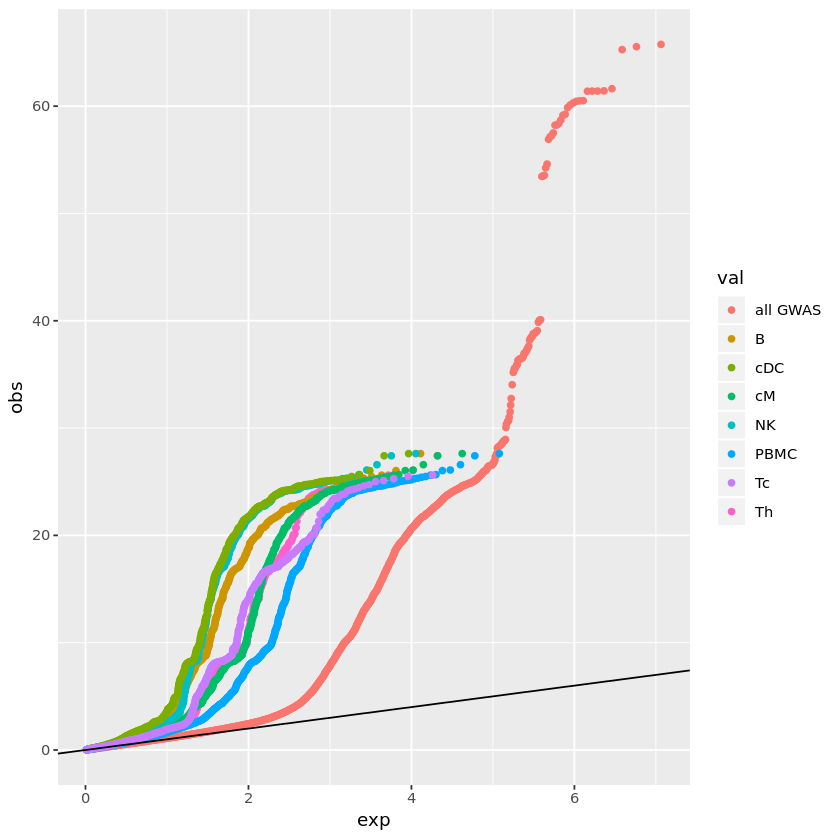

In [22]:
all.gwas=-log10(sort(ibd$P, decreasing=F, na.last=T))
gwas.snps=ibd$snp

th.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['Th']])], decreasing = F,na.last = T))
b.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['B']])], decreasing = F,na.last = T))
nk.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['NK']])], decreasing = F,na.last = T))
cm.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['cM']])], decreasing = F,na.last = T))
cdc.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['cDC']])], decreasing = F,na.last = T))
pbmc.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['PBMC']])], decreasing = F,na.last = T))
tc.gwas=-log10(sort(ibd$P[which(gwas.snps %in% het.snps[['Tc']])], decreasing = F,na.last = T))

exp=c(-log10(1:nrow(ibd)/nrow(ibd)), -log10(1:length(th.gwas)/length(th.gwas)), -log10(1:length(b.gwas)/length(b.gwas)))
exp=c(exp,-log10(1:length(nk.gwas)/length(nk.gwas)), -log10(1:length(cm.gwas)/length(cm.gwas)))
exp=c(exp,-log10(1:length(cdc.gwas)/length(cdc.gwas)), -log10(1:length(pbmc.gwas)/length(pbmc.gwas)))
exp=c(exp, -log10(1:length(tc.gwas)/length(tc.gwas)))


obs=c(all.gwas, th.gwas, b.gwas, nk.gwas, cm.gwas, cdc.gwas, pbmc.gwas, tc.gwas)


val=c(rep('all GWAS', length(all.gwas)), rep('Th', length(th.gwas)), rep('B', length(b.gwas)), rep('NK', length(nk.gwas)))
val=c(val, rep('cM', length(cm.gwas)), rep('cDC', length(cdc.gwas)), rep('PBMC', length(pbmc.gwas)))
val=c(val, rep('Tc', length(tc.gwas)))

df=data.frame(exp=exp, obs=obs,val=val)
print(head(df))

df.use=downsampleQQ(df)
ggplot(df.use,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)